In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive/', force_remount=True)


Mounted at /content/gdrive/


In [ ]:
#!unzip /content/gdrive/MyDrive/Datasets/NER/ner_dataset.csv.zip
#!unzip /content/gdrive/MyDrive/Datasets/NER/ner_final.csv.zip

Archive:  /content/gdrive/MyDrive/Datasets/NER/ner_dataset.csv.zip
  inflating: ner_dataset.csv         
Archive:  /content/gdrive/MyDrive/Datasets/NER/ner_final.csv.zip
  inflating: ner.csv                 


###Upload the Dataset in google colab or local jupyter notebbok. Make sure to give the correct path, Upload the zip files

In [ ]:
!unzip ner_dataset.csv.zip
!unzip ner_final.csv.zip

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df_words = pd.read_csv("ner_dataset.csv", encoding = "ISO-8859-1")
df_sentences = pd.read_csv("ner.csv", encoding='ISO-8859-1')


In [ ]:
df_words.head(5)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [ ]:
df_words.shape

(1048575, 4)

In [ ]:
df_sentences.head()

,Sentence #,Sentence,POS,Tag
0,Sentence: 1,Thousands of demonstrators have marched throug...,"['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '..."
1,Sentence: 2,Families of soldiers killed in the conflict jo...,"['NNS', 'IN', 'NNS', 'VBN', 'IN', 'DT', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
2,Sentence: 3,They marched from the Houses of Parliament to ...,"['PRP', 'VBD', 'IN', 'DT', 'NNS', 'IN', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
3,Sentence: 4,"Police put the number of marchers at 10,000 wh...","['NNS', 'VBD', 'DT', 'NN', 'IN', 'NNS', 'IN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
4,Sentence: 5,The protest comes on the eve of the annual con...,"['DT', 'NN', 'VBZ', 'IN', 'DT', 'NN', 'IN', 'D...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."


In [ ]:
n_rows =df_words.shape[0]
columns = df_words.columns

## Data analysis

In [ ]:
unique_tags = list(df_words.Tag.unique())
print(unique_tags)

['O', 'B-geo', 'B-gpe', 'B-per', 'I-geo', 'B-org', 'I-org', 'B-tim', 'B-art', 'I-art', 'I-per', 'I-gpe', 'I-tim', 'B-nat', 'B-eve', 'I-eve', 'I-nat']


In [ ]:
tags_count = {}
count = 0
for tag in unique_tags:
  for i in df_words.Tag:
    if tag == i:
      count = count+1
      tags_count[tag] = count
  count =0

tags_count


{'O': 887908,
 'B-geo': 37644,
 'B-gpe': 15870,
 'B-per': 16990,
 'I-geo': 7414,
 'B-org': 20143,
 'I-org': 16784,
 'B-tim': 20333,
 'B-art': 402,
 'I-art': 297,
 'I-per': 17251,
 'I-gpe': 198,
 'I-tim': 6528,
 'B-nat': 201,
 'B-eve': 308,
 'I-eve': 253,
 'I-nat': 51}

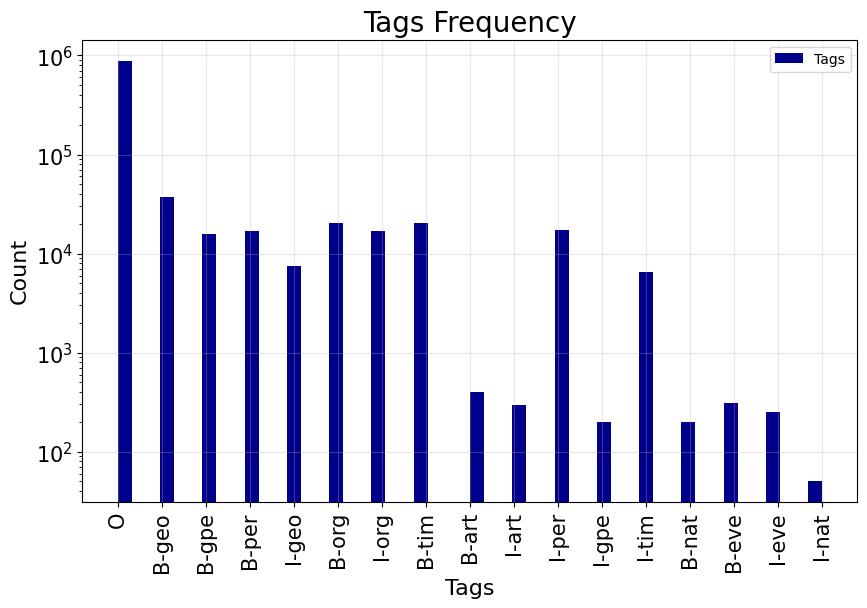

In [ ]:
plt.figure(figsize = (10, 6))
plt.hist(df_words.Tag, log = True, label = 'Tags', color = 'darkblue', bins = 50)
plt.xlabel('Tags', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.title("Tags Frequency", fontsize = 20)
plt.grid(alpha=0.3)
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=90)
plt.show()


## Pre-processing

In [ ]:
df_sentences.head()

,Sentence #,Sentence,POS,Tag
0,Sentence: 1,Thousands of demonstrators have marched throug...,"['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '..."
1,Sentence: 2,Families of soldiers killed in the conflict jo...,"['NNS', 'IN', 'NNS', 'VBN', 'IN', 'DT', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
2,Sentence: 3,They marched from the Houses of Parliament to ...,"['PRP', 'VBD', 'IN', 'DT', 'NNS', 'IN', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
3,Sentence: 4,"Police put the number of marchers at 10,000 wh...","['NNS', 'VBD', 'DT', 'NN', 'IN', 'NNS', 'IN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
4,Sentence: 5,The protest comes on the eve of the annual con...,"['DT', 'NN', 'VBZ', 'IN', 'DT', 'NN', 'IN', 'D...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."


In [ ]:
X = list(df_sentences["Sentence"])
Y = list(df_sentences["Tag"])

In [ ]:
len(X)

47959

In [ ]:
#Converting out Tags to list of tags to match our sentences
from ast import literal_eval
Y_ready = []

for sen_tags in Y:
    Y_ready.append(literal_eval(sen_tags))


###Tokenization

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences


In [ ]:
# cutoff reviews after 110 words
maxlen = 110

# consider the top 36000 words in the dataset
max_words = 36000

# tokenize each sentence in the dataset
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)


In [ ]:
word_index = tokenizer.word_index


###Sentence Padding

In [ ]:
X_preprocessed = pad_sequences(sequences, maxlen=maxlen, padding='post')
X_ready = X_preprocessed[0:int(47959*0.7)]
X_test = X_preprocessed[int(47959*0.7):]


In [ ]:
# dict. that map each tag to its identifier
tags2id = {}
for i, tag in enumerate(unique_tags):
    tags2id[tag] = i
    
#print(tags2id)

id2tags = {}
for i, tag in enumerate(unique_tags):
    id2tags[i] = tag
#print(id2tags)

In [ ]:
def preprocess_tags(tags2id, Y_ready):
    
    Y_preprocessed = []
    maxlen = 110
    # for each target 
    for y in Y_ready:
        
        # place holder to store the new preprocessed tag list
        Y_place_holder = []
        
        # for each tag in rhe tag list 
        for tag in y:
            # append the id of the tag in the place holder list
            Y_place_holder.append(tags2id[tag])
        
        # find the lenght of the new preprocessed tag list 
        len_new_tag_list = len(Y_place_holder)
        # find the differance in length between the len of tag list and padded sentences
        num_O_to_add = maxlen - len_new_tag_list
        
        # add 'O's to padd the tag lists
        padded_tags = Y_place_holder + ([tags2id['O']] * num_O_to_add)
        Y_preprocessed.append(padded_tags)
        
    return Y_preprocessed

In [ ]:
Y_preprocessed = preprocess_tags(tags2id, Y_ready)
Y_ready = Y_preprocessed[0:int(47959*0.7)]
Y_test = Y_preprocessed[int(47959*0.7):]
print(len(Y_test))

14388


In [ ]:
X_preprocessed = np.array(X_preprocessed)
Y_preprocessed = np.array(Y_preprocessed)



In [ ]:
!pip install iterative-stratification
!pip install tf2crf


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 38.8 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential 
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

from tf2crf import CRF, ModelWithCRFLoss
from keras.models import Model
from keras.layers import Input




def bidirect_NN_model():
    embedding_dim = 128
    maxlen = 110
    max_words = 36000
    num_tags = len(unique_tags)
    input_layer = Input(shape=(maxlen,), dtype='int32')
    embedding_layer = tf.keras.layers.Embedding(max_words, embedding_dim, input_length=maxlen)(input_layer)
    bidirectional_lstm_1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=64, activation='tanh', return_sequences=True))(embedding_layer)
    bidirectional_lstm_2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=64, activation='tanh', return_sequences=True))(bidirectional_lstm_1)

    crf = CRF(num_tags)
    output_layer = crf(bidirectional_lstm_2)

    model = Model(inputs=input_layer, outputs=output_layer)

    model.summary()
    return model , crf

def get_sample_weights(y, class_weights):
    sample_weights = np.zeros(y.shape)
    for i in range(y.shape[0]):
        for j in range(y.shape[1]):
            sample_weights[i, j] = class_weights[y[i, j]]
    return sample_weights

def evaluation(model,X_test,Y_test):
  
  #Calculate Predictions
  Y_pred = model.predict(X_test)


/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
n_splits = 5
mskf = MultilabelStratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

def Bi_Directional_LSTM_CRF(X_preprocessed,Y_preprocessed):
    #accuracies = []

    u_tags = sorted(set(np.ravel(Y_preprocessed)))  # Find unique tags in the dataset
    class_weights = compute_class_weight('balanced', classes=u_tags, y=np.ravel(Y_preprocessed))
    class_weight_dict = dict(enumerate(class_weights))

    #X_train, Y_train , X_valid, Y_valid, X_test, Y_test = split_X_Y(X_preprocessed, Y_preprocessed)


    X_1 = X_preprocessed[0: int(X_preprocessed.shape[0]*0.8) ]
    Y_1 = Y_preprocessed[0: int(Y_preprocessed.shape[0]*0.8) ]

    X_test = X_preprocessed[int(X_preprocessed.shape[0]*0.8) : ]
    Y_test = Y_preprocessed[int(Y_preprocessed.shape[0]*0.8):  ] 

    
    for train_index, valid_index in mskf.split(X_1, Y_1):
      X_train, X_valid = X_1[train_index], X_1[valid_index] 
      Y_train, Y_valid = Y_1[train_index], Y_1[valid_index]  



      model , crf = bidirect_NN_model()

      #model.add(crf) # Add the CRF layer to the model
      model = ModelWithCRFLoss(model, crf) 
      #compile the model
      model.compile(optimizer='adam')

      sample_weights_train = get_sample_weights(Y_train, class_weight_dict)
      sample_weights_valid = get_sample_weights(Y_valid, class_weight_dict)


      #train the model
      model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), epochs=5, sample_weight=sample_weights_train)


      sample_weights_test = get_sample_weights(Y_test, class_weight_dict)


      #Evaluation
      #result = model.evaluate(X_test , Y_test ,sample_weight=sample_weights_test)[1]

      #accuracies.append(result)
    #avg_accuracy =sum(accuracies)/5

    




    return  model , X_train, Y_train , X_test, Y_test

In [ ]:
model, X_train, Y_train , X_test, Y_test = Bi_Directional_LSTM_CRF(X_preprocessed, Y_preprocessed)

#print("Avg Accuracy for Bi directional Neural Network is :",accuracy)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 110)]             0         
                                                                 
 embedding (Embedding)       (None, 110, 128)          4608000   
                                                                 
 bidirectional (Bidirectiona  (None, 110, 128)         98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 110, 128)         98816     
 nal)                                                            
                                                                 
 crf (CRF)                   ((None, 110),             2482      
                              (None, 110, 17),                   
                              (None,),                       

In [ ]:
predictions = model.predict(X_test, batch_size=64)
Y_pred= predictions
Y_pred = np.argmax(Y_pred, axis=-1)

150/150 [==============================] - 9s 46ms/step


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import hamming_loss, jaccard_score, f1_score

# Convert Y_test and Y_pred to lists of sets
Y_test_sets = [set(y) for y in Y_test]
Y_pred_sets = [set([tag]) for tag in Y_pred.ravel()]

# Use MultiLabelBinarizer to convert the sets to binary arrays
mlb = MultiLabelBinarizer()
Y_test_bin = mlb.fit_transform(Y_test_sets)
Y_pred_bin = mlb.transform(Y_pred_sets)

# Calculate the metrics
hl = hamming_loss(Y_test_bin, Y_pred_bin)
js = jaccard_score(Y_test_bin, Y_pred_bin, average='samples')
f1 = f1_score(Y_test_bin, Y_pred_bin, average='samples')

print("Hamming Loss:", hl)
print("Jaccard Score:", js)
print("F1 Score:", f1)


Hamming Loss: 0.20440440563214443
Jaccard Score: 0.21763941015661198
F1 Score: 0.25655498298846924


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42] will be ignored
  warnings.warn(


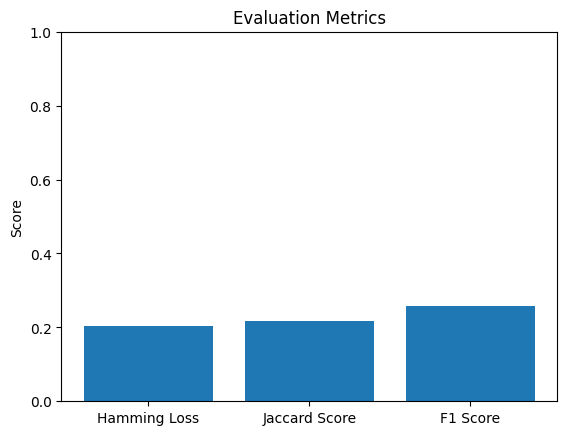

In [ ]:
import matplotlib.pyplot as plt

# Create the bar chart
metrics = ['Hamming Loss', 'Jaccard Score', 'F1 Score']
values = [hl, js, f1]

plt.bar(metrics, values)
plt.ylim(0, 1)
plt.title('Evaluation Metrics')
plt.ylabel('Score')
plt.show()


In [ ]:
o_tag_index = list(unique_tags).index('O')

Y_test_bin_no_o = np.delete(Y_test_bin, o_tag_index, axis=1)
Y_pred_bin_no_o = np.delete(Y_pred_bin, o_tag_index, axis=1)

hl_no_o = hamming_loss(Y_test_bin_no_o, Y_pred_bin_no_o)
js_no_o = jaccard_score(Y_test_bin_no_o, Y_pred_bin_no_o, average='weighted')
f1_no_o = f1_score(Y_test_bin_no_o, Y_pred_bin_no_o, average='weighted')

print("Hamming Loss without 'O':", hl_no_o)
print("Jaccard Score without 'O':", js_no_o)
print("F1 Score without 'O':", f1_no_o)



Hamming Loss without 'O': 0.1694380733944954
Jaccard Score without 'O': 0.060830126770520535
F1 Score without 'O': 0.11387282221903476


In [ ]:
def predict_tags(model, sentence, tokenizer, maxlen, unique_tags, id2tags):
    # Tokenize the input sentence
    sequence = tokenizer.texts_to_sequences([sentence])

    # Pad the sequence
    padded_sequence = pad_sequences(sequence, maxlen=maxlen, padding='post')

    # Predict tags for the given sentence
    predictions = model.predict(padded_sequence)

    # Get the predicted tag indices
    predicted_indices = np.argmax(predictions, axis=-1)

    # Convert the numpy array to a list of integers
    predicted_indices_list = [int(index) for index in predictions[0]]

    # Convert the predicted tag indices to tag names
    predicted_tags = [id2tags[index] for index in predicted_indices_list]

    # Truncate the predicted tags at the end of the input sentence
    truncated_tags = predicted_tags[:len(sentence.split())]

    return truncated_tags


# Example usage




In [ ]:
predicted_tags = predict_tags(model, X[0], tokenizer, maxlen, unique_tags, id2tags)

print("This is input senctence :\n",X[0])
print("\n")
print("This is the Actual Tags :\n",Y[0])
print("\n")
print("This is the Predicted Tags :\n",predicted_tags)


1/1 [==============================] - 0s 167ms/step
This is input senctence :
 Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country .


This is the Actual Tags :
 ['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O']


This is the Predicted Tags :
 ['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O']


In [ ]:
input_sentence = "Apple is looking to buy a London based startup for $1 Billion"
predicted_tags = predict_tags(model, input_sentence, tokenizer, maxlen, unique_tags, id2tags)

print("\nThis is input senctence :\n",input_sentence)
print("\n")

print("This is the Predicted Tags :\n",predicted_tags)

1/1 [==============================] - 0s 68ms/step

This is input senctence :
 Apple is looking to buy a London based startup for $1 Billion


This is the Predicted Tags :
 ['B-org', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


In [ ]:
input_sentence = "apple London city"
predicted_tags = predict_tags(model, input_sentence, tokenizer, maxlen, unique_tags, id2tags)

print("\nThis is input senctence :\n",input_sentence)
print("\n")

print("This is the Predicted Tags :\n",predicted_tags)

1/1 [==============================] - 0s 59ms/step

This is input senctence :
 apple London city


This is the Predicted Tags :
 ['B-geo', 'O', 'B-geo']


#Bi Directional LSTM

In [ ]:
X_preprocessed.shape

(47959, 110)

In [ ]:
X_2 = X_preprocessed[0: int(X_preprocessed.shape[0]*0.8) ]
Y_2 = Y_preprocessed[0: int(Y_preprocessed.shape[0]*0.8) ]

X_test = X_preprocessed[int(X_preprocessed.shape[0]*0.8): ]
Y_test = Y_preprocessed[int(Y_preprocessed.shape[0]*0.8):  ] 

In [ ]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Embedding, Bidirectional, LSTM, TimeDistributed, Dense


embedding_dim = 128
lstm_units = 64

# Model architecture
input_layer = Input(shape=(maxlen,))
embedding_layer = Embedding(max_words, embedding_dim, input_length=maxlen)(input_layer)
bi_lstm_layer = Bidirectional(LSTM(lstm_units, return_sequences=True))(embedding_layer)
output_layer = TimeDistributed(Dense(len(unique_tags), activation="softmax"))(bi_lstm_layer)

# Compile the model
model_lstm = Model(inputs=input_layer, outputs=output_layer)
model_lstm.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model_lstm.summary()



Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 110)]             0         
                                                                 
 embedding_5 (Embedding)     (None, 110, 128)          4608000   
                                                                 
 bidirectional_10 (Bidirecti  (None, 110, 128)         98816     
 onal)                                                           
                                                                 
 time_distributed (TimeDistr  (None, 110, 17)          2193      
 ibuted)                                                         
                                                                 
Total params: 4,709,009
Trainable params: 4,709,009
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Split the data into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_2, Y_2, test_size=0.2, random_state=42)

# Prepare the data for the model
Y_train = np.expand_dims(Y_train, -1)
Y_val = np.expand_dims(Y_val, -1)

# Train the model
epochs = 5
batch_size = 64


history = model_lstm.fit(
    X_train, Y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val, Y_val),
    verbose=1
)


Epoch 1/5
480/480 [==============================] - 40s 77ms/step - loss: 0.1817 - accuracy: 0.9679 - val_loss: 0.1026 - val_accuracy: 0.9721
Epoch 2/5
480/480 [==============================] - 10s 22ms/step - loss: 0.0847 - accuracy: 0.9752 - val_loss: 0.0770 - val_accuracy: 0.9767
Epoch 3/5
480/480 [==============================] - 8s 16ms/step - loss: 0.0673 - accuracy: 0.9786 - val_loss: 0.0701 - val_accuracy: 0.9787
Epoch 4/5
480/480 [==============================] - 7s 15ms/step - loss: 0.0579 - accuracy: 0.9811 - val_loss: 0.0683 - val_accuracy: 0.9792
Epoch 5/5
480/480 [==============================] - 6s 13ms/step - loss: 0.0508 - accuracy: 0.9830 - val_loss: 0.0682 - val_accuracy: 0.9793


In [ ]:
# Prepare the test data for the model
X_test = np.array(X_test)
Y_test = np.expand_dims(Y_test, -1)

In [ ]:
# Prepare the test data for the model
X_test = np.array(X_test)
Y_test = np.expand_dims(Y_test, -1)

# Evaluate the model
score, accuracy = model_lstm.evaluate(X_val, Y_val, batch_size=batch_size)
print("Test score:", score)
print("Test accuracy:", accuracy)

predictions = model_lstm.predict(X_test)

120/120 [==============================] - 1s 6ms/step - loss: 0.0682 - accuracy: 0.9793
Test score: 0.06817901134490967
Test accuracy: 0.9793269038200378
300/300 [==============================] - 1s 4ms/step


In [ ]:
predictions.shape

(9592, 110, 17)

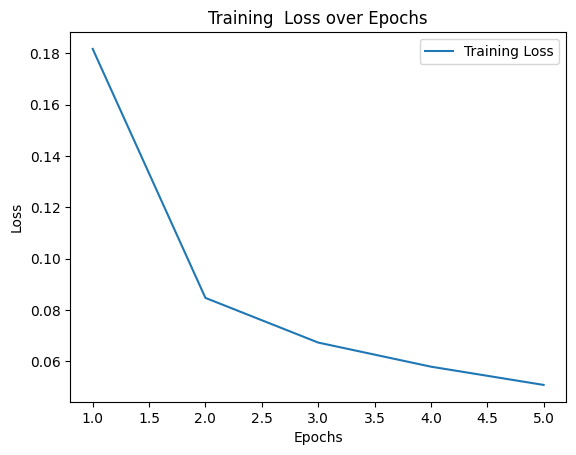

In [ ]:
plt.plot(range(1, epochs + 1), history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training  Loss over Epochs')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Predict tags for the test set
Y_pred_classes = np.argmax(predictions, axis=-1)

# Flatten the true and predicted tags
Y_test_flat = Y_test.flatten()
Y_pred_flat = Y_pred_classes.flatten()

# Compute precision, recall, F1 score, and support
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test_flat, Y_pred_flat, average='weighted', zero_division=0)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1_score:.2f}")


Precision: 0.98
Recall: 0.98
F1 score: 0.98


In [ ]:
from sklearn.metrics import hamming_loss, jaccard_score
from sklearn.preprocessing import MultiLabelBinarizer

# Convert the true and predicted tags to one-hot encoding
mlb = MultiLabelBinarizer()
Y_test_one_hot = mlb.fit_transform(Y_test_flat.reshape(-1, 1))
Y_pred_one_hot = mlb.transform(Y_pred_flat.reshape(-1, 1))

# Calculate Hamming loss
hamming_loss_value = hamming_loss(Y_test_one_hot, Y_pred_one_hot)
print(f"Hamming loss: {hamming_loss_value:.2f}")

# Calculate Jaccard score (also known as the Jaccard similarity coefficient)
jaccard_score_value = jaccard_score(Y_test_one_hot, Y_pred_one_hot, average='weighted')
print(f"Jaccard score: {jaccard_score_value:.2f}")


Hamming loss: 0.00
Jaccard score: 0.96


In [ ]:
# Define a function for preprocessing a single input sentence
def preprocess_sentence(sentence, tokenizer, maxlen):
    sequence = tokenizer.texts_to_sequences([sentence])
    padded_sequence = pad_sequences(sequence, maxlen=maxlen, padding="post", truncating="post")
    return padded_sequence

# Define a function to convert the predicted tags back to their original string representation
def tags_from_pred(Y_pred_classes, unique_tags):
    return [unique_tags[tag_index] for tag_index in Y_pred_classes]

# Input sentence
input_sentence = "Apple is looking to buy a Alex based startup for London"

# Preprocess the input sentence
input_preprocessed = preprocess_sentence(input_sentence, tokenizer, maxlen)

# Make predictions
Y_pred = model_lstm.predict(input_preprocessed)
Y_pred_classes = np.argmax(Y_pred, axis=-1)

# Get the predicted tags
predicted_tags = tags_from_pred(Y_pred_classes[0], unique_tags)

# Combine the input words with their predicted tags
input_words = input_sentence.split()
result = list(zip(input_words, predicted_tags))

print(result)


1/1 [==============================] - 0s 26ms/step
[('Apple', 'B-org'), ('is', 'O'), ('looking', 'O'), ('to', 'O'), ('buy', 'O'), ('a', 'O'), ('Alex', 'O'), ('based', 'O'), ('startup', 'O'), ('for', 'O'), ('London', 'O')]


In [ ]:
# Define a function for preprocessing a single input sentence
def preprocess_sentence(sentence, tokenizer, maxlen):
    sequence = tokenizer.texts_to_sequences([sentence])
    padded_sequence = pad_sequences(sequence, maxlen=maxlen, padding="post", truncating="post")
    return padded_sequence

# Define a function to convert the predicted tags back to their original string representation
def tags_from_pred(Y_pred_classes, unique_tags):
    return [unique_tags[tag_index] for tag_index in Y_pred_classes]

# Input sentence
input_sentence = X[0]

# Preprocess the input sentence
input_preprocessed = preprocess_sentence(input_sentence, tokenizer, maxlen)

# Make predictions
Y_pred = model_lstm.predict(input_preprocessed)
Y_pred_classes = np.argmax(Y_pred, axis=-1)

# Get the predicted tags
predicted_tags_lstm = tags_from_pred(Y_pred_classes[0], unique_tags)
truncated_tags_lstm = predicted_tags_lstm[:len(input_sentence.split())]


# Combine the input words with their predicted tags
#input_words = input_sentence.split()
#result = list(zip(input_words, predicted_tags))


print("This is input senctence :\n",X[0])
print("\n")
print("This is the Actual Tags :\n",Y[0])
print("\n")
print("This is the Predicted Tags :\n",truncated_tags_lstm)

1/1 [==============================] - 0s 27ms/step
This is input senctence :
 Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country .


This is the Actual Tags :
 ['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O']


This is the Predicted Tags :
 ['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O']


In [ ]:
input_sentence = "Apple is looking to buy a London based startup for $1 Billion"

# Preprocess the input sentence
input_preprocessed = preprocess_sentence(input_sentence, tokenizer, maxlen)

# Make predictions
Y_pred = model_lstm.predict(input_preprocessed)
Y_pred_classes = np.argmax(Y_pred, axis=-1)

# Get the predicted tags
predicted_tags_lstm = tags_from_pred(Y_pred_classes[0], unique_tags)
truncated_tags_lstm = predicted_tags_lstm[:len(input_sentence.split())]

print("\nThis is input senctence :\n",input_sentence)
print("\n")

print("This is the Predicted Tags :\n",truncated_tags_lstm)

1/1 [==============================] - 0s 24ms/step

This is input senctence :
 Apple is looking to buy a London based startup for $1 Billion


This is the Predicted Tags :
 ['B-org', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O']


In [ ]:
input_sentence = "Apple London city"

# Preprocess the input sentence
input_preprocessed = preprocess_sentence(input_sentence, tokenizer, maxlen)

# Make predictions
Y_pred = model_lstm.predict(input_preprocessed)
Y_pred_classes = np.argmax(Y_pred, axis=-1)

# Get the predicted tags
predicted_tags_lstm = tags_from_pred(Y_pred_classes[0], unique_tags)
truncated_tags_lstm = predicted_tags_lstm[:len(input_sentence.split())]

print("\nThis is input senctence :\n",input_sentence)
print("\n")

print("This is the Predicted Tags :\n",truncated_tags_lstm)

1/1 [==============================] - 0s 25ms/step

This is input senctence :
 Apple London city


This is the Predicted Tags :
 ['B-org', 'B-geo', 'O']
